Opencv-saliency-detection
https://en.wikipedia.org/wiki/Saliency_map

#### Static saliency
- Static spectral saliency
- Fine grained. This next block mimics our first method, with the exception that we’re instantiating the fine grained object. We’re also going to perform a threshold to demonstrate a binary map that you might process for contours (i.e., to extract each salient region). The contributors for this code implemented the fine grained saliency differently than the spectral saliency. 

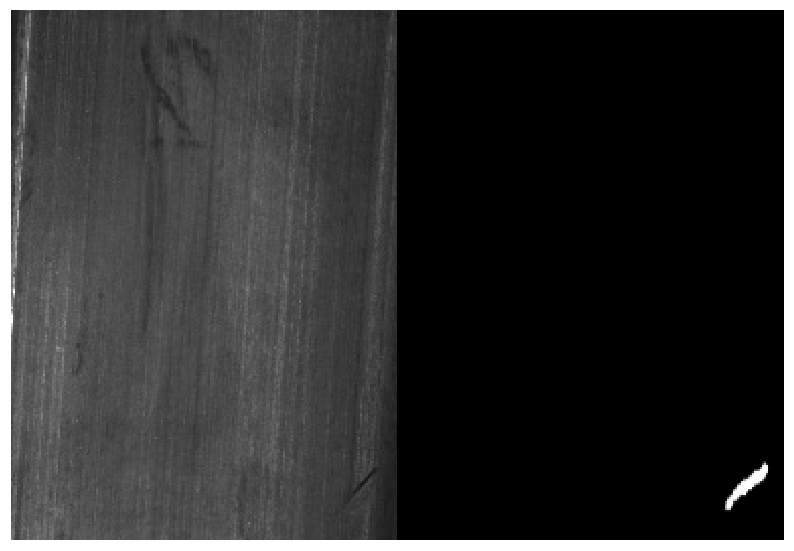

In [4]:
from utils_global import *
%matplotlib inline
import cv2
im = cv2.imread('exp1_num_320649.jpg')
im_lab = cv2.imread('exp1_num_320649.png')

plot_ims([im, im_lab])

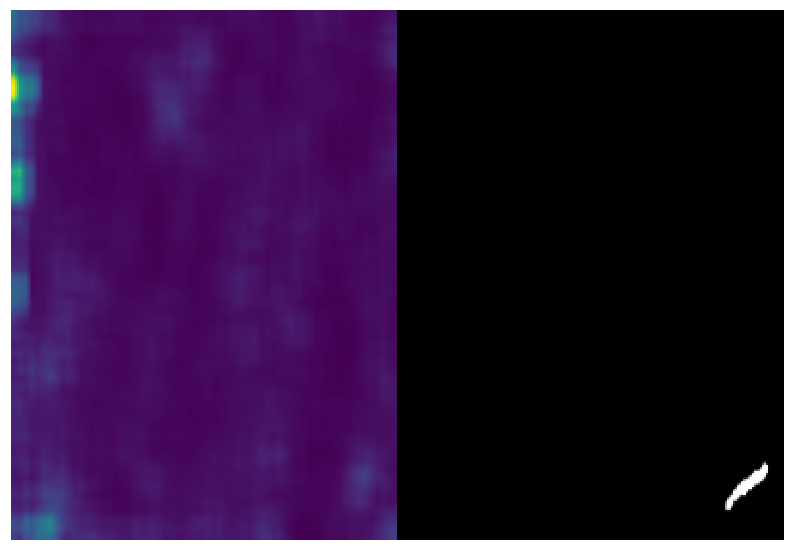

In [5]:
# initialize OpenCV's static saliency spectral residual detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(im)
saliencyMap = (saliencyMap * 255) # .astype("uint8")
plot_ims([saliencyMap, im_lab])

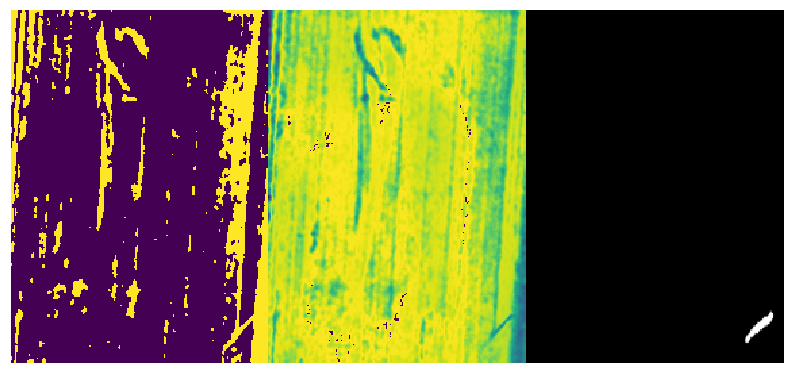

In [9]:
# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(im)
 
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap, 0, 255,
cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plot_ims([threshMap, (saliencyMap * 255), im_lab])

In [31]:
# Objectness saliency
# initialize OpenCV's objectness saliency detector and set the path
# to the input model files
model_path = 'objectness_trained_model'

saliency = cv2.saliency.ObjectnessBING_create()
saliency.setTrainingPath(model_path)
 
# compute the bounding box predictions used to indicate saliency
(success, saliencyMap) = saliency.computeSaliency(im)
numDetections = saliencyMap.shape[0]
saliencyMap

array([[[  1,   1, 191, 262]],

       [[ 33,   1, 160, 262]],

       [[ 33,  97, 160, 224]],

       ..., 
       [[ 17,   1,  48, 128]],

       [[ 33,   1,  64, 128]],

       [[ 77, 129, 108, 256]]], dtype=int32)

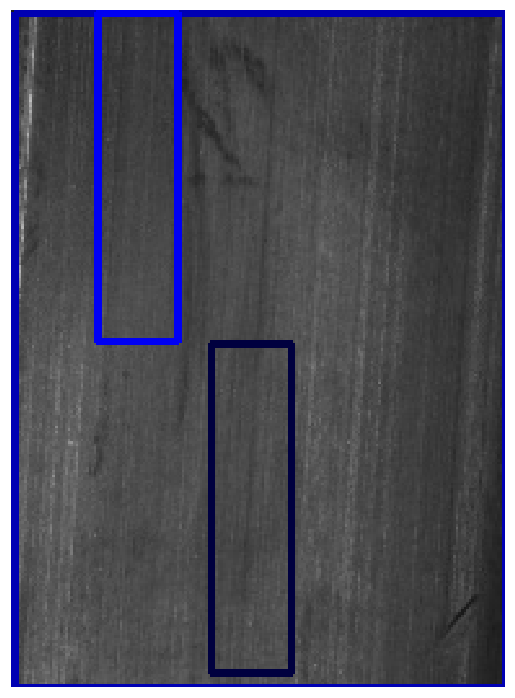

In [37]:
# loop over X detections
max_detections = 3

# randomly generate colors 
colors = np.random.randint(0, 255, size=(max_detections,))
im_out = im.copy()

for i in range(0, min(numDetections, max_detections)):
    # extract the bounding box coordinates
    (startX, startY, endX, endY) = saliencyMap[-i].flatten()
    # draw it on the image
    color = [int(c) for c in colors]
    cv2.rectangle(im_out, (startX, startY), (endX, endY), color[i], 2)
    
plot_im(im_out)

In [ ]:
# Motion saliency
saliency = cv2.saliency.MotionSaliencyBinWangApr2014_create()
saliency.setImagesize(frame.shape[1], frame.shape[0])
saliency.init()

In [40]:
cv2.__version__

'3.2.0'

In [41]:
https://www.learnopencv.com/selective-search-for-object-detection-cpp-python/

SyntaxError: invalid syntax (<ipython-input-41-b7d6202448f3>, line 1)

In [43]:
im = cv2.imread('exp1_num_320649.jpg')
im.shape

(262, 191, 3)

In [44]:
im_lab.shape

(262, 191, 3)

In [49]:
from scipy import ndimage
i = ndimage.imread('exp1_num_320649.jpg')
#                    , flatten=False, mode=None)
i.shape

(262, 191)

In [51]:
i = cv2.imread('exp1_num_320649.jpg')
i.shape

(262, 191, 3)